<a href="https://colab.research.google.com/github/navya480/linear-regression/blob/main/ML_Predict_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression with Predict Diabetes - Machine Learning with Python

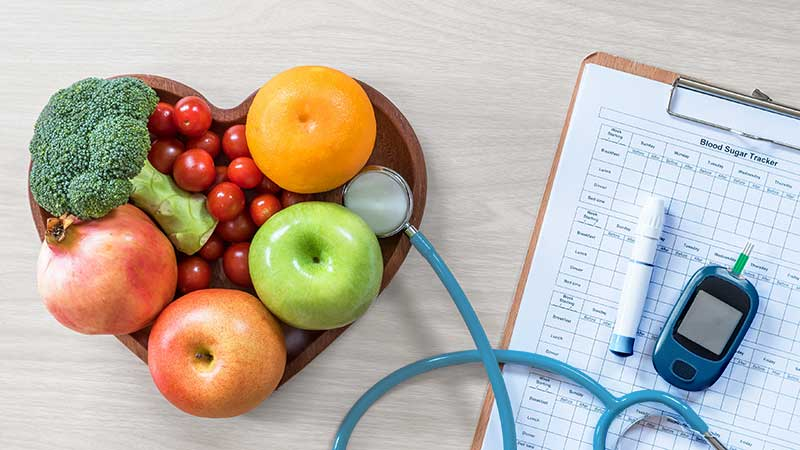

The following topics are covered in this tutorial:

- A typical problem statement for machine learning
- Downloading and exploring a dataset for machine learning
- Linear regression with one variable using Scikit-learn
- Linear regression with multiple variables
- Using categorical features for machine learning
- Regression coefficients and feature importance
- Other models and techniques for regression using Scikit-learn
- Applying linear regression to other datasets

### How to run the code
This tutorial is an executable [Jupyter notebook](https://jupyter.org) You can _run_ this tutorial and experiment with the code examples in a couple of ways: *using free online resources* (recommended) or *on your computer*.

#### Option 1: Running using free online resources (1-click, recommended)

The easiest way to start executing the code is to click the **Run** button at the top of this page and select **Run on Binder**. You can also select "Run on Colab" or "Run on Kaggle", but you'll need to create an account on [Google Colab](https://colab.research.google.com) or [Kaggle](https://kaggle.com) to use these platforms.


#### Option 2: Running on your computer locally

To run the code on your computer locally, you'll need to set up [Python](https://www.python.org), download the notebook and install the required libraries. We recommend using the [Conda](https://docs.conda.io/projects/conda/en/latest/user-guide/install/) distribution of Python. Click the **Run** button at the top of this page, select the **Run Locally** option, and follow the instructions.

>  **Jupyter Notebooks**: This tutorial is a [Jupyter notebook](https://jupyter.org) - a document made of _cells_. Each cell can contain code written in Python or explanations in plain English. You can execute code cells and view the results, e.g., numbers, messages, graphs, tables, files, etc., instantly within the notebook. Jupyter is a powerful platform for experimentation and analysis. Don't be afraid to mess around with the code & break things - you'll learn a lot by encountering and fixing errors. You can use the "Kernel > Restart & Clear Output" menu option to clear all outputs and start again from the top.

## Problem Statement

This tutorial takes a practical and coding-focused approach. We'll define the terms _machine learning_ and _linear regression_ in the context of a problem, and later generalize their definitions. We'll work through a typical machine learning problem step-by-step:

 **QUESTION**: ACME Insurance Inc. offers affordable health insurance to thousands of customer all over the United States. As the lead data scientist at ACME, **you're tasked with creating an automated system to estimate the Diabetes are there are not for new customers**, using information such as their age,Pregnancies,sex, BMI,Glucose,BloodPressure,SkinThickness,DiabetesPedigreeFunction,and Outcome
 >
 > Estimates from your system will be used to determine the person have diabetes are not  to the customer. Due to regulatory requirements, you must be able to explain why your system outputs a certain prediction.

 You're given a [CSV file]('https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv') containing verified historical data, consisting of the aforementioned information and the actual medical charges incurred by over 1300 customers.
> <img src="" width="480">
>
> Dataset source: https://github.com/stedy/Machine-Learning-with-R-datasets


**EXERCISE**: Before proceeding further, take a moment to think about how can approach this problem. List five or more ideas that come to your mind below:

 1. ???
 2. ???
 3. ???
 4. ???
 5. ???

## Downloading the Data
To begin, let's download the data using the `urlretrieve` function from `urllib.request`.

We can now create a Pandas dataframe using the downloaded file, to view and analyze the data.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
diabetes = pd.read_csv('/content/archive (10) (1).zip')

In [ ]:
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


The dataset contains 768 rows and 9 columns. Each row of the dataset contains information about one customer.

The objective of this dataset is to build a predictive model for diagnosing diabetes in female patients who are at least 21 years old and of Pima Indian heritage. The model should predict whether a patient has diabetes (Outcome = 1) or does not have diabetes (Outcome = 0) based on several diagnostic measurements, including glucose level, blood pressure, skin thickness, insulin level, BMI, diabetes pedigree function, and age.

Let's check the data type for each column.

In [ ]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Looks like "age", "BloodPressure","Glucose","scinthickness","bmi" ([body mass index](https://en.wikipedia.org/wiki/Body_mass_index)) and "Insulin" are numbers, whereas " DiabetesPedigreeFunction ", are float (possibly categories). None of the columns contain any missing values, which saves us a fair bit of work!

Here are some statistics for the numerical columns:

In [ ]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


The ranges of values in the numerical columns seem reasonable too (no negative ages!), so we may not have to do much data cleaning or correction. The "BloodPressure" column seems to be significantly skewed however, as the median (50 percentile) is much lower than the maximum value.

> **EXERCISE**: What other inferences can you draw by looking at the table above? Add your inferences below:
>
> 1. ???
> 2. ???
> 3. ???
> 4. ???
> 5. ???

## Exploratory Analysis and Visualization

Let's explore the data by visualizing the distribution of values in some columns of the dataset, and the relationships between "charges" and other columns.

We'll use libraries Matplotlib, Seaborn and Plotly for visualization.

In [ ]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

### Age

Age is a numeric column. The minimum age in the dataset is 21 and the maximum age is 81. Thus, we can visualize the distribution of age using a histogram with 47 bins (one for each year) and a box plot. We'll use plotly to make the chart interactive, but you can create similar charts using Seaborn.

In [ ]:
diabetes.Age.describe()

,Age
count,768.000000
mean,33.240885
std,11.760232
min,21.000000
25%,24.000000
50%,29.000000
75%,41.000000
max,81.000000


In [ ]:
fig = px.histogram(diabetes,
                   x = 'Age',
                   marginal='box',
                   nbins=47,
                   title='Age Distribution')
fig.update_layout(bargap=0.05)
fig.show()

The distribution of ages in the dataset is almost uniform, with 20-30 customers at every age, except for the ages 48 and 80, which seem to have over twice as many customers as other ages. The uniform distribution might arise from the fact that there isn't a big variation in the [number of people of any given age] (between 21 & 81) .



> **EXERCISE**: Can you explain why there are over twice as many customers with ages 18 and 19, compared to other ages?
>
> ???


### Body Mass Index

Let's look at the distribution of BMI (Body Mass Index) of customers, using a histogram and box plot.

In [ ]:
fig = px.histogram(diabetes,
                   x = 'BMI',
                   marginal='box',
                   title='Age Distribution')
fig.update_layout(bargap=0.05)
fig.show()

The measurements of body mass index seem to form a [Gaussian distribution](https://en.wikipedia.org/wiki/Normal_distribution) centered around the value 30, with a few outliers towards the right. Here's how BMI values can be interpreted ([source](https://study.com/academy/lesson/what-is-bmi-definition-formula-calculation.html)):

![](https://i.imgur.com/lh23OiY.jpg)

> **EXERCISE**: Can you explain why the distribution of ages forms a uniform distribution while the distribution of BMIs forms a gaussian distribution?
>
> ???

###Glucose and Outcome Correlation

Let's visualize the distribution of "Glucose" i.e. the people are diabetec are not . This is the column we're trying to predict. Let's also use the categorical column "outcome" to distinguish the  glucose percentage.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



<Axes: xlabel='Glucose', ylabel='Count'>

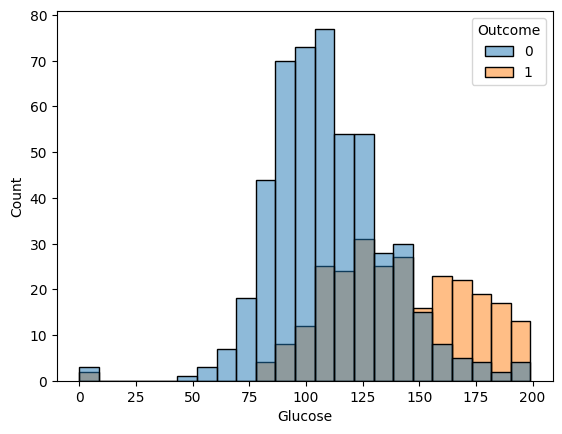

In [ ]:
sns.histplot(diabetes, x='Glucose',hue='Outcome')

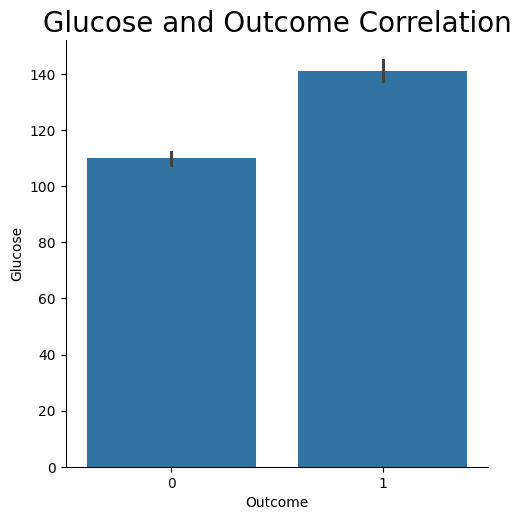

In [ ]:
p=sns.catplot(x="Outcome",y="Glucose", data=diabetes, kind='bar')
plt.title("Glucose and Outcome Correlation", size=20, y=1.0);

In [ ]:
fig = px.histogram(diabetes,
             x='Glucose',

             title = 'glucose persentage',
             color='Outcome')
fig.update_layout(bargap=0.05)
fig.show()

We can make the following observations from the above graph:

* For most of diabetec, are under glucose %100 to 150. Only a small fraction of people have higher diabetes , possibly due to bloodpresure, major insulation  and genetic diseases. The distribution follows a "power law"
* There is a significant difference in diabetes percentage  between bmi value  and bloodpresure.

> **EXERCISE**: Visualize the distribution of medical charges in connection with other factors like "Age" and "glucose". What do you observe?

###Outcome
Let's visualize the distribution of the "outcomes" column (containing values "0" and "1") using a histogram.

In [ ]:
px.histogram(diabetes, x='Outcome',color='Outcome')

It appears that 20% of people have reported that they diabetes. Can you verify whether this matches the national average, assuming the data was collected in 2020? We can also see that most of the people having diabetes. Can you verify this?

**EXERCISE**: Visualize the distributions of the "diabetes" columns and report your observations.

Having looked at individual columns, we can now visualize the relationship between "Insulin" (the value we wish to predict) and other columns.

### Age and Insulin
Let's visualize the relationship between "Age" and "Insulin" using a scatter plot. Each point in the scatter plot represents one customer. We'll also use values in the "outcome" column to color the points.


In [ ]:
px.scatter(diabetes,
           x ='Age',
           y = 'Insulin',
           color='Outcome',
           title = 'Age VS insulin')

We can make the following observations from the above chart:

* The general trend seems to be that diabetes increase with age, as we might expect. However, there is significant variation at every age, and it's clear that age alone cannot be used to accurately determine diabetes.


* We can see three "insulin" of points, each of which seems to form a line with an increasing slope:

     1. The first and the largest cluster consists primary of presumably "high insulin have more diabetec" who have relatively high diabetes
     
     2. The second cluster contains a mix of diabetes and high insulin. It's possible that these are actually two distinct but overlapping clusters: "diabetec withhigh insulin" and "non diabetec with less insulin".
     
     3. The final cluster consists exclusively of insulin, presumably insulin with major diabetec  issues that are possibly related to or worsened by insulin.
     

> **EXERCISE**: What other inferences can you draw from the above chart?
>
> ???

### BMI and Charges

Let's visualize the relationship between BMI (body mass index) and glucose using another scatter plot. Once again, we'll use the values from the outcome column to color the points.

In [ ]:
px.scatter(diabetes,
           x = 'BMI',
           y ='Glucose',
           color = 'Outcome',
           title = 'BMI VS Glucose')

It appears that for diabetec, an increase in BMI doesn't seem to be related to an increase in diabetes. However, diabetes seem to be significantly higher for high glucose with a BMI greater than 30.

What other insights can you gather from the above graph?

### Correlation

As you can tell from the analysis, the values in some columns are more closely related to the values in "outcome" compared to other columns. E.g. "Age" and "outcome" seem to grow together, whereas "bmi" and "outcome" don't.

This relationship is often expressed numerically using a measure called the _correlation coefficient_, which can be computed using the `.corr` method of a Pandas series.

In [ ]:
diabetes.Glucose.corr(diabetes.Age)

0.2635143198243338

In [ ]:
diabetes.BloodPressure.corr(diabetes.BMI)

0.2818052888499106

To compute the correlation for categorical columns, they must first be converted into numeric columns.

In [ ]:
outcome_val = {'no':0,'yes':1}
outcome_num = diabetes.Glucose.map(outcome_val)
diabetes.BloodPressure.corr(outcome_num)

nan

Here's how correlation coefficients can be interpreted ([source](https://statisticsbyjim.com/basics/correlations)):

* **Strength**: The greater the absolute value of the correlation coefficient, the stronger the relationship.

    * The extreme values of -1 and 1 indicate a perfectly linear relationship where a change in one variable is accompanied by a perfectly consistent change in the other. For these relationships, all of the data points fall on a line. In practice, you won’t see either type of perfect relationship.

    * A coefficient of zero represents no linear relationship. As one variable increases, there is no tendency in the other variable to either increase or decrease.
    
    * When the value is in-between 0 and +1/-1, there is a relationship, but the points don’t all fall on a line. As r approaches -1 or 1, the strength of the relationship increases and the data points tend to fall closer to a line.


* **Direction**: The sign of the correlation coefficient represents the direction of the relationship.

    * Positive coefficients indicate that when the value of one variable increases, the value of the other variable also tends to increase. Positive relationships produce an upward slope on a scatterplot.
    
    * Negative coefficients represent cases when the value of one variable increases, the value of the other variable tends to decrease. Negative relationships produce a downward slope.

Here's the same relationship expressed visually ([source](https://www.cuemath.com/data/how-to-calculate-correlation-coefficient/)):

<img src="https://i.imgur.com/3XUpDlw.png" width="360">

Pandas dataframes also provide a `.corr` method to compute the correlation coefficients between all pairs of numeric columns.

In [ ]:
diabetes.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


The result of `.corr` is called a correlation matrix and is often visualized using a heatmap.

<Axes: >

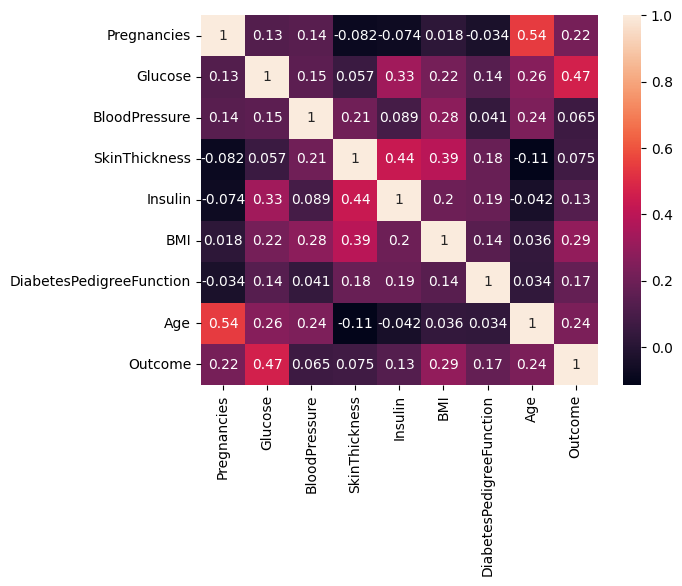

In [ ]:
sns.heatmap(diabetes.corr(), annot=True)

## Linear Regression using a Single Feature

We now know that the "Glucose" and "Age" columns have the strongest correlation with "outcome". Let's try to find a way of estimating the value of "outcome" using the value of "Age" for non-diabetec. First, let's create a data frame containing just the data for non-diabetec.

In [ ]:
non_diabetic=diabetes[diabetes.Outcome == 0]

In [ ]:
non_diabetic

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
10,4,110,92,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0


Next, let's visualize the relationship between "age" and "outcome"

<Axes: xlabel='Age', ylabel='Outcome'>

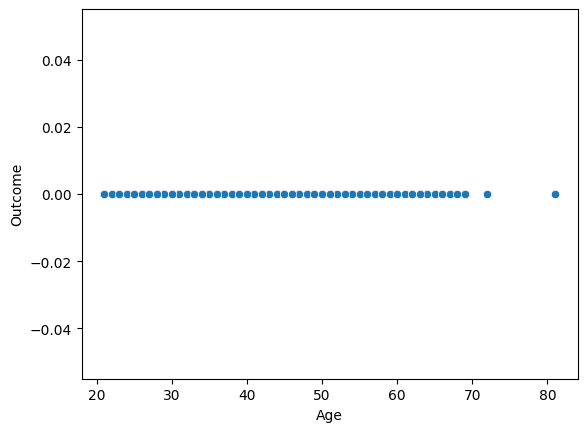

In [ ]:
sns.scatterplot(data=non_diabetic, x='Age',y='Outcome')

Apart from a few exceptions, the points seem to form a line. We'll try and "fit" a line using this points, and use the line to predict charges for a given age. A line on the X&Y coordinates has the following formula:

$y = wx + b$

The line is characterized two numbers: $w$ (called "slope") and $b$ (called "intercept").

### Model

In the above case, the x axis shows "age" and the y axis shows "charges". Thus, we're assuming the following relationship between the two:

$charges = w \times age + b$

We'll try determine $w$ and $b$ for the line that best fits the data.

* This technique is called _linear regression_, and we call the above equation a _linear regression model_, because it models the relationship between "Age" and "outcome" as a straight line.

* The numbers $w$ and $b$ are called the _parameters_ or _weights_ of the model.

<Axes: xlabel='Age', ylabel='Outcome'>

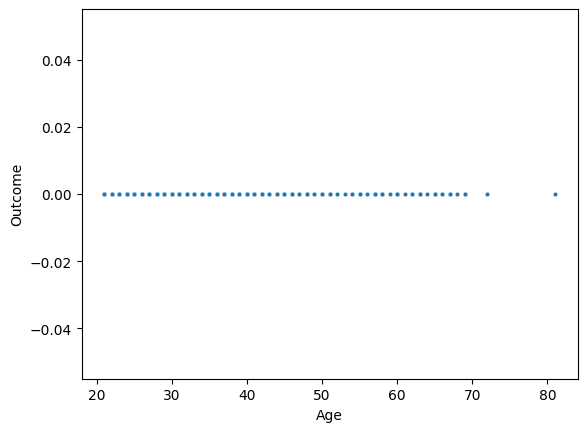

In [ ]:
sns.scatterplot(data=non_diabetic, x='Age',y='Outcome',s=10)

In [ ]:
def estimate_charges(Age, w, b):
  return w * Age + b

The `estimate_charges` function is our very first _model_.

Let's _guess_ the values for $w$ and $b$ and use them to estimate the value for charges.

In [ ]:
w = 50
b = 100

In [ ]:
Ages = non_diabetic.Age
estimated_charges = estimate_charges(Ages, w, b)

We can plot the estimated charges using a line graph.

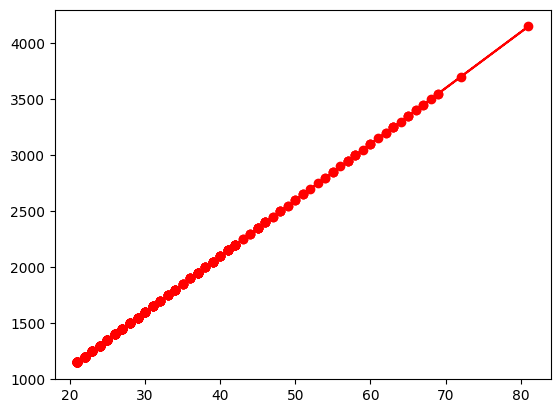

In [ ]:
plt.plot(Ages,estimated_charges, 'r-o')

As expected, the points lie on a straight line.

We can overlay this line on the actual data, so see how well our _model_ fits the _data_.

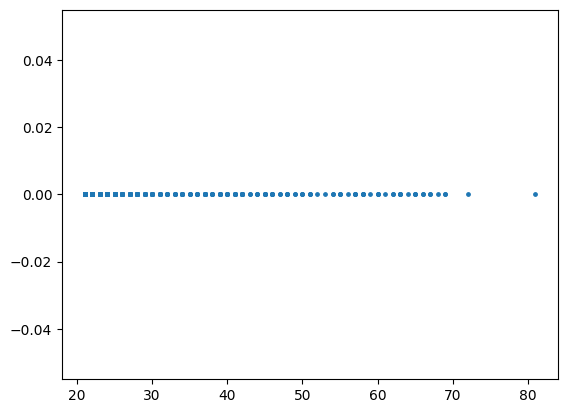

In [ ]:
target = non_diabetic.Outcome
plt.scatter(Ages,target,s=6)

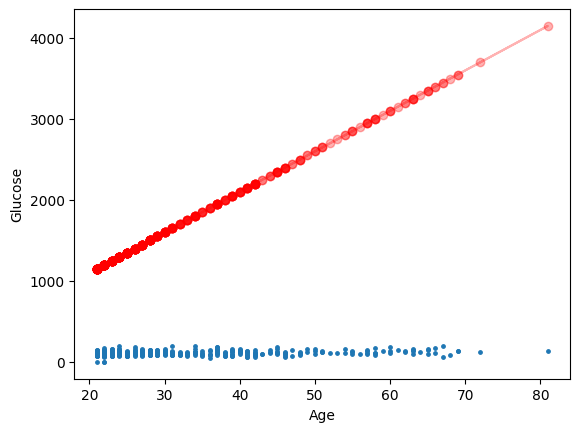

In [ ]:
target = non_diabetic.Glucose
plt.plot(Ages,estimated_charges, 'r-o',alpha=0.3)
plt.scatter(Ages,target,s=6)
plt.xlabel('Age');
plt.ylabel("Glucose");

Clearly, the our estimates are quite poor and the line does not "fit" the data. However, we can try different values of $w$ and $b$ to move the line around. Let's define a helper function `try_parameters` which takes `w` and `b` as inputs and creates the above plot.

In [ ]:
def try_parameters(w, b):
  Ages = non_diabetic.Age
  target = non_diabetic.Insulin

  estimated_charges = estimate_charges(Ages, w, b)

  plt.plot(Ages,estimated_charges, 'r-o',alpha=0.7)
  plt.scatter(Ages,target,s=6)
  plt.xlabel('Age');
  plt.ylabel("Insulin");

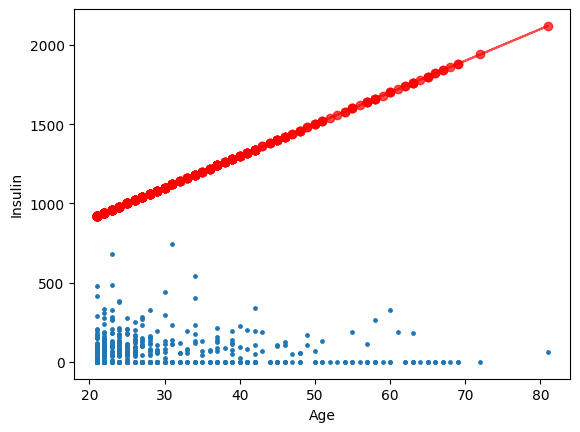

In [ ]:
try_parameters(20, 500)

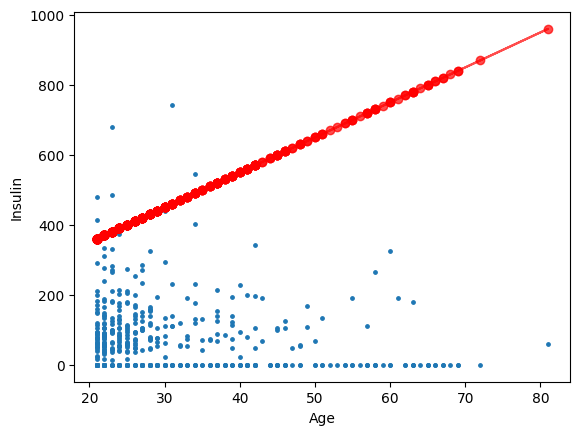

In [ ]:
try_parameters(10, 150)

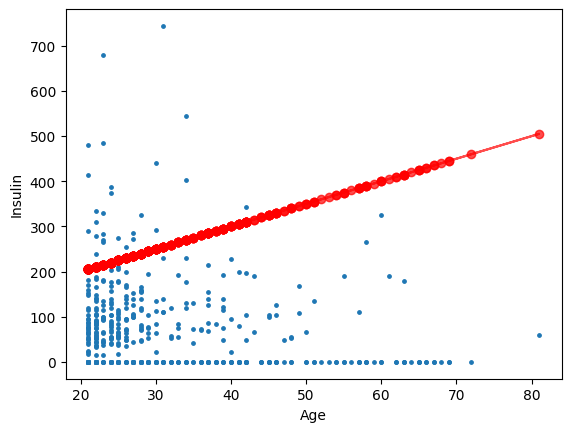

In [ ]:
try_parameters(5,100 )

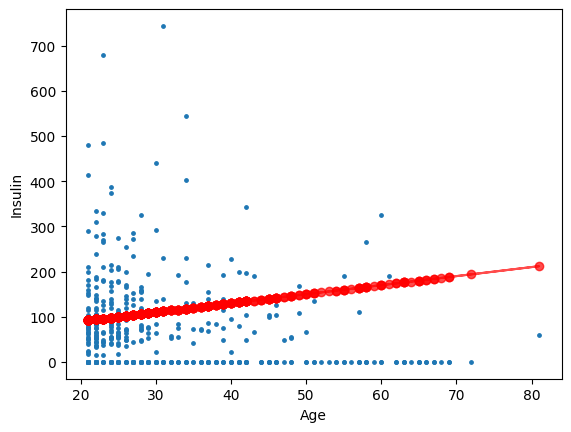

In [ ]:
try_parameters(2,50)

> **EXERCISE**: Try various values of $w$ and $b$ to find a line that best fits the data. What is the effect of changing the value of $w$? What is the effect of changing $b$?

As we change the values, of $w$ and $b$ manually, trying to move the line visually closer to the points, we are _learning_ the approximate relationship between "age" and "charges".

Wouldn't it be nice if a computer could try several different values of `w` and `b` and _learn_ the relationship between "age" and "charges"? To do this, we need to solve a couple of problems:

1. We need a way to measure numerically how well the line fits the points.

2. Once the "measure of fit" has been computed, we need a way to modify `w` and `b` to improve the the fit.

If we can solve the above problems, it should be possible for a computer to determine `w` and `b` for the best fit line, starting from a random guess.

### Loss/Cost Function

We can compare our model's predictions with the actual targets using the following method:

* Calculate the difference between the targets and predictions (the differenced is called the "residual")
* Square all elements of the difference matrix to remove negative values.
* Calculate the average of the elements in the resulting matrix.
* Take the square root of the result

The result is a single number, known as the **root mean squared error** (RMSE). The above description can be stated mathematically as follows:

<img src="https://i.imgur.com/WCanPkA.png" width="360">

Geometrically, the residuals can be visualized as follows:

<img src="https://i.imgur.com/ll3NL80.png" width="420">

Let's define a function to compute the RMSE.

In [ ]:
targets = non_diabetic['Glucose']
predicted = estimate_charges(non_diabetic.Age, w, b)

In [ ]:
def rmse(targets, predictions):
  return np.sqrt(np.mean(np.square(targets - predictions)))

In [ ]:
w=50
b=150

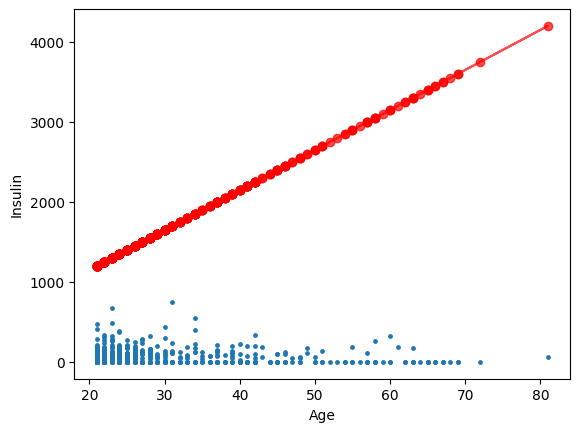

In [ ]:
try_parameters(w, b)

Let's compute the RMSE for our model with a sample set of weights

In [ ]:
targets = non_diabetic['Glucose']
predicted = estimate_charges(non_diabetic.Age, w, b)

In [ ]:
rmse(targets, predicted)

1700.5470284587839

Here's how we can interpret the above number: *On average, each element in the prediction differs from the actual target by \\1700*.

The result is called the *loss* because it indicates how bad the model is at predicting the target variables. It represents information loss in the model: the lower the loss, the better the model.

Let's modify the `try_parameters` functions to also display the loss.

In [ ]:
def try_parameters(w, b):
    Ages =non_diabetic.Age
    target =non_diabetic. Glucose
    predictions = estimate_charges(Ages, w, b)

    plt.plot(Ages, predictions, 'r', alpha=0.9);
    plt.scatter(Ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel(' Glucose')
    plt.legend(['Prediction', 'Actual']);

    loss = rmse(targets, predictions)
    print("RMSE LOSS:" ,loss)

RMSE LOSS: 369.7671104898325


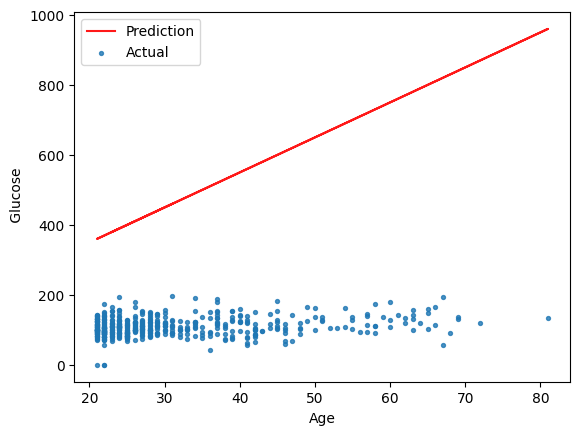

In [ ]:
try_parameters(10,150)

> **EXERCISE**: Try different values of $w$ and $b$ to minimize the RMSE loss. What's the lowest value of loss you are able to achieve? Can you come with a general strategy for finding better values of $w$ and $b$ by trial and error?

RMSE LOSS: 322.54568048572594


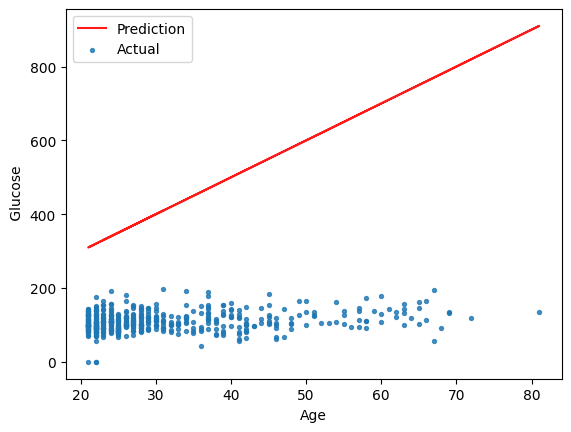

In [ ]:
try_parameters(10,100)

RMSE LOSS: 253.71778810323883


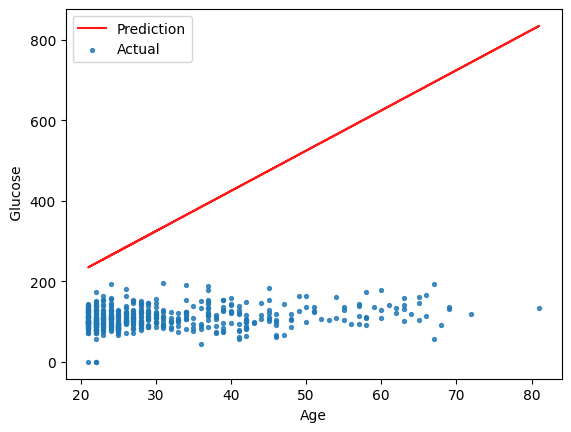

In [ ]:
try_parameters(10, 25)

### Optimizer

Next, we need a strategy to modify weights `w` and `b` to reduce the loss and improve the "fit" of the line to the data.

* Ordinary Least Squares: (better for smaller datasets)
* Stochastic gradient descent: (better for larger datasets)

Both of these have the same objective: to minimize the loss, however, while ordinary least squares directly computes the best values for `w` and `b` using matrix operations, while gradient descent uses a iterative approach, starting with a random values of `w` and `b` and slowly improving them using derivatives.

Here's a visualization of how gradient descent works:

![](https://miro.medium.com/max/1728/1*NO-YvpHHadk5lLxtg4Gfrw.gif)

Doesn't it look similar to our own strategy of gradually moving the line closer to the points?



### Linear Regression using Scikit-learn

In practice, you'll never need to implement either of the above methods yourself. You can use a library like `scikit-learn` to do this for you.

In [ ]:
from sklearn.linear_model import LinearRegression

Let's use the `LinearRegression` class from `scikit-learn` to find the best fit line for "age" vs. "charges" using the ordinary least squares optimization technique.

First, we create a new model object.

In [ ]:
model = LinearRegression()

Next, we can use the `fit` method of the model to find the best fit line for the inputs and targets.

Not that the input `X` must be a 2-d array, so we'll need to pass a dataframe, instead of a single column.

In [ ]:
inputs = non_diabetic[['Age']]
targets = non_diabetic.Insulin
print('Inputs.Shape:',inputs.shape)
print('Targets.Shape:',targets.shape)

Inputs.Shape: (500, 1)
Targets.Shape: (500,)


Let's fit the model to the data.

In [ ]:
model.fit(inputs, targets)

LinearRegression()

In [ ]:
model.predict(np.array([[23],
                       [37],
                       [61]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([79.14844232, 61.44512211, 31.09657318])

Do these values seem reasonable? Compare them with the scatter plot above.

Let compute the predictions for the entire set of inputs

In [ ]:
inputs

,Age
1,31
3,21
5,30
7,29
10,30
...,...
762,33
763,63
764,27
765,30


In [ ]:
predictions = model.predict(inputs)

In [ ]:
predictions

array([69.03225935, 81.67748807, 70.29678222, 71.56130509, 70.29678222,
       36.15466467, 66.5032136 , 74.09035083, 45.00632478, 80.41296519,
       36.15466467, 60.18059924, 32.36109605, 80.41296519, 72.82582796,
       51.32893914, 66.5032136 , 63.97416786, 75.35487371, 61.44512211,
       47.53537052, 57.6515535 , 71.56130509, 80.41296519, 77.88391945,
       80.41296519, 75.35487371, 70.29678222, 55.12250775, 81.67748807,
       69.03225935, 52.59346201, 80.41296519, 81.67748807, 62.70964499,
       77.88391945, 67.76773647, 39.94823329, 76.61939658, 74.09035083,
       75.35487371, 79.14844232, 80.41296519, 80.41296519, 56.38703062,
       74.09035083, 77.88391945, 80.41296519, 80.41296519, 62.70964499,
       80.41296519, 74.09035083, 51.32893914, 75.35487371, 77.88391945,
       81.67748807, 65.23869073, 55.12250775, 81.67748807, 57.6515535 ,
       77.88391945, 80.41296519, 79.14844232, 80.41296519, 81.67748807,
       77.88391945, 74.09035083, 81.67748807, 74.09035083, 61.44

Let's compute the RMSE loss to evaluate the model.

In [ ]:
rmse(targets, predictions)

97.66038654233559

Seems like our prediction is off by $97 on average, which is not too bad considering the fact that there are several outliers.

The parameters of the model are stored in the `coef_` and `intercept_` properties.

In [ ]:
model.intercept_

108.23246838149623

In [ ]:
model.coef_

array([-1.26452287])

Are these parameters close to your best guesses?

Let's visualize the line created by the above parameters.

RMSE LOSS: 97.66038654233559


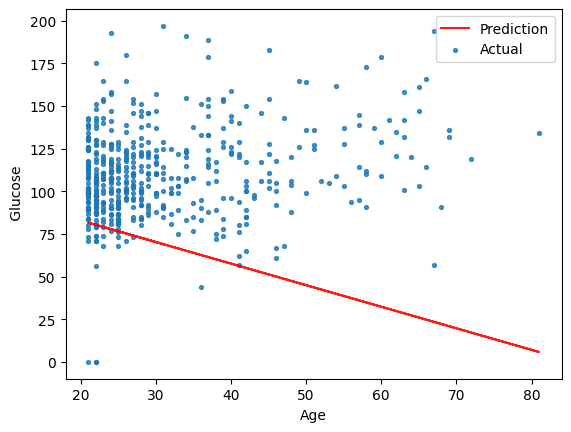

In [ ]:
try_parameters(model.coef_, model.intercept_)

> **EXERCISE**: Repeat the steps is this section to train a linear regression model to estimate medical charges for smokers. Visualize the targets and predictions, and compute the loss.

### Machine Learning

Congratulations, you've just trained your first _machine learning model!_ Machine learning is simply the process of computing the best parameters to model the relationship between some feature and targets.

Every machine learning problem has three components:

1. **Model**

2. **Cost Function**

3. **Optimizer**

We'll look at several examples of each of the above in future tutorials. Here's how the relationship between these three components can be visualized:

<img src="https://i.imgur.com/oiGQFJ9.png" width="480">

As we've seen above, it takes just a few lines of code to train a machine learning model using `scikit-learn`.                                               

In [ ]:
# create inputs and targets
inputs, targets = non_diabetic[['Age']],non_diabetic['Insulin']

# create and train model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# compute the loss
loss = rmse(targets, predictions)
print('Loss: ',loss)

Loss:  97.66038654233559


## Linear Regression using Multiple Features

So far, we've used on the "age" feature to estimate "charges". Adding another feature like "bmi" is fairly straightforward. We simply assume the following relationship:

$charges = w_1 \times Age + w_2 \times Insulin + b$

We need to change just one line of code to include the BMI.

In [ ]:
# create inputs and targets
inputs, targets = non_diabetic[['Age','BMI','BloodPressure']], non_diabetic['Insulin']

# create and train model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# compute the loss
loss = rmse(targets, predictions)
print('Loss: ',loss)

Loss:  94.21768869796198


As you can see, adding the BMI doesn't seem to reduce the loss by much, as the BMI has a very weak correlation with outcome, especially for non diabetec.

In [ ]:
non_diabetic.Insulin.corr(non_diabetic.BMI)

0.25420153367168385

In [ ]:
px.scatter(non_diabetic, x='BMI',y='Insulin')

We can also visualize the relationship between all 3 variables "age", "bmi" and "Insulin" using a 3D scatter plot.

In [ ]:
fig  = px.scatter_3d(non_diabetic, x='Age',y='BMI',z='Insulin')
fig.update_traces(marker_size = 4)
fig.show()

You can see that it's harder to interpret a 3D scatter plot compared to a 2D scatter plot. As we add more features, it becomes impossible to visualize all feature at once, which is why we use measures like correlation and loss.

Let's also check the parameters of the model.

In [ ]:
model.coef_, model.intercept_

(array([-1.37348552,  3.26274345,  0.09446716]), 6.315034333030994)

Clearly, BMI has a much lower weightage, and you can see why. It has a tiny contribution, and even that is probably accidental. This is an important thing to keep in mind: you can't find a relationship that doesn't exist, no matter what machine learning technique or optimization algorithm you apply.

> **EXERCISE**: Train a linear regression model to estimate charges using BMI alone. Do you expect it to be better or worse than the previously trained models?

Let's go one step further, and add the final numeric column: "BloodPressure", which seems to have some correlation with " DiabetesPedigreeFunction".

$charges = w_1 \times Age + w_2 \times BMI + w_3 \times Insulin + b$

In [ ]:
non_diabetic. DiabetesPedigreeFunction.corr(non_diabetic.BloodPressure)

0.027291539412618963

In [ ]:
px.strip(non_diabetic, x="BloodPressure", y ='Glucose')

In [ ]:
# create inputs and targets
inputs, targets = non_diabetic[['Age','BMI','BloodPressure']], non_diabetic['Insulin']

# create and train model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# compute the loss
loss = rmse(targets, predictions)
print('Loss: ',loss)

Loss:  94.21768869796198


Once again, we don't see a big reduction in the loss, even though it's greater than in the case of BMI.

 >**EXERCISE**: Repeat the steps is this section to train a linear regression model to estimate diabetes  for . Visualize the targets and predictions, and compute the loss.

In [ ]:
inputs, targets = diabetes[['Age','BMI','Insulin']], diabetes['Glucose']

model = LinearRegression().fit(inputs, targets)

predictions = model.predict(inputs)

loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 28.430032180316555


> **EXERCISE**: Repeat the steps is this section to train a linear regression model to estimate medical charges for all customers. Visualize the targets and predictions, and compute the loss. Is the loss lower or higher?

## Using Categorical Features for Machine Learning

So far we've been using only numeric columns, since we can only perform computations with numbers. If we could use categorical columns like "smoker", we can train a single model for the entire dataset.

To use the categorical columns, we simply need to convert them to numbers. There are three common techniques for doing this:

1. If a categorical column has just two categories (it's called a binary category), then we can replace their values with 0 and 1.
2. If a categorical column has more than 2 categories, we can perform one-hot encoding i.e. create a new column for each category with 1s and 0s.
3. If the categories have a natural order (e.g. cold, neutral, warm, hot), then they can be converted to numbers (e.g. 1, 2, 3, 4) preserving the order. These are called ordinals


## Binary Categories

The "smoker" category has just two values "yes" and "no". Let's create a new column "non_diabetec" containing 0 for "no" and 1 for "yes".


<Axes: xlabel='Outcome', ylabel='Insulin'>

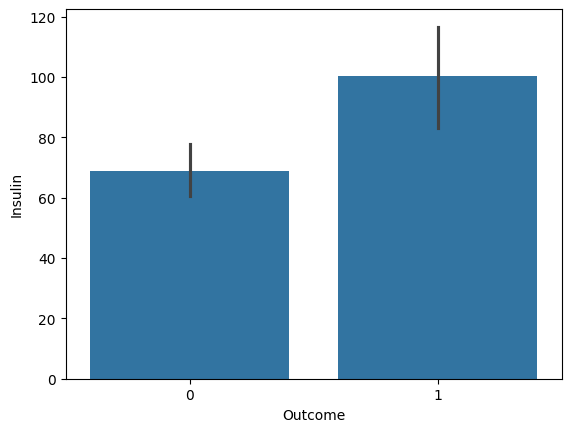

In [ ]:
sns.barplot(data=diabetes, x='Outcome',y ='Insulin')

In [ ]:
diabetes.Insulin.corr(diabetes.Outcome)

0.13054795488404794

We can now use the `Outcome` column for linear regression.

$charges = w_1 \times Age + w_2 \times BMI + w_3 \times insulin + w_4 \times outcme + b$

In [ ]:
# create inputs and targets
inputs, targets = diabetes[['Age','BMI','Insulin','Outcome']], diabetes['Glucose']

# create and train model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# compute the loss
loss = rmse(targets, predictions)
print('Loss: ',loss)

Loss:  26.230413103708873


The loss reduces from `11` to `26`, almost by 50%! This is an important lesson: never ignore categorical data.


$charges = w_1 \times Age + w_2 \times BMI + w_3 \times Insulin+ w_4 \times Outcome + w_5 \times Glucose + b$

<Axes: xlabel='Outcome', ylabel='BloodPressure'>

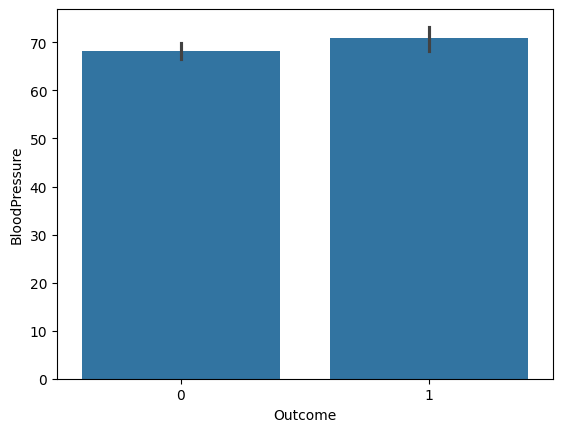

In [ ]:
sns.barplot(data= diabetes, x = 'Outcome',y ='BloodPressure')

In [ ]:
diabetes.BloodPressure.corr(diabetes.Outcome)

0.0650683595503327

In [ ]:
# create inputs and targets
inputs, targets = diabetes[['Age','BMI','BloodPressure','Glucose','Insulin','Pregnancies','DiabetesPedigreeFunction']], diabetes['Outcome']

# create and train model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# compute the loss
loss = rmse(targets, predictions)
print('Loss: ',loss)

Loss:  0.3978636156916986


As you might expect, this does have a significant impact on the loss.

### One-hot Encoding

The "region" column contains 4 values, so we'll need to use hot encoding and create a new column for each region.

![](https://i.imgur.com/n8GuiOO.png)


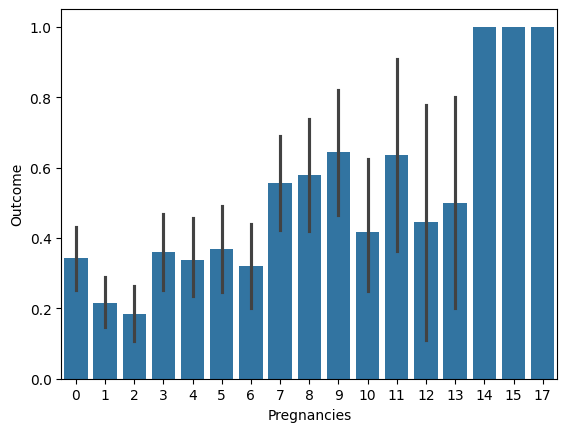

In [ ]:
sns.barplot(data = diabetes, x = 'Pregnancies', y = 'Outcome');

In [ ]:
from sklearn import preprocessing
encode = preprocessing.OneHotEncoder()
encode.fit(diabetes[['Pregnancies']])
encode.categories_

[array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 17])]

In [ ]:
one_hot = encode.transform(diabetes[['Pregnancies']]).toarray()
one_hot

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

## Model Improvements

Let's discuss and apply some more improvements to our model.

### Feature Scaling

Recall that due to regulatory requirements, we also need to explain the rationale behind the predictions our model.

$charges = w_1 \times Age + w_2 \times BMI + w_3 \times Insulin + w_4 \times Glucose + w_5 \times Bloodpresure + w_6 \times DiabetesPedigreeFunction + b$

To compare the importance of each feature in the model, our first instinct might be to compare their weights.

In [ ]:
model.coef_

array([ 0.00259913,  0.01333824, -0.00231521,  0.00590919, -0.00017213,
        0.02059386,  0.14788352])

In [ ]:
model.intercept_

-0.8537905685107392

In [ ]:
input_cols = ['Age','BMI','BloodPressure','Glucose','Insulin','Pregnancies','DiabetesPedigreeFunction']

In [ ]:
weights_df = pd.DataFrame({
    'feature': np.append(input_cols, 1),
    'weight' : np.append(model.coef_, model.intercept_)
})
weights_df

,feature,weight
0,Age,0.002599
1,BMI,0.013338
2,BloodPressure,-0.002315
3,Glucose,0.005909
4,Insulin,-0.000172
5,Pregnancies,0.020594
6,DiabetesPedigreeFunction,0.147884
7,1,-0.853791


While it seems like BMI and the "DiabetesPedigreeFunction" have a higher weight than age, keep in mind that the range of values for BMI is limited (15 to 40) and the "DiabetesPedigreeFunction" column only takes the values 0 and 1.

Because different columns have different ranges, we run into two issues:

1. We can't compare the weights of different column to identify which features are important
2. A column with a larger range of inputs may disproportionately affect the loss and dominate the optimization process.

For this reason, it's common practice to scale (or standardize) the values in numeric column by subtracting the mean and dividing by the standard deviation.

![](https://i.imgur.com/dT5fLFI.png)

We can apply scaling using the StandardScaler class from `scikit-learn`.

In [ ]:
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
numeric_cols = ['Age','BMI','Insulin']
scaler = StandardScaler()
scaler.fit(diabetes[numeric_cols])

StandardScaler()

In [ ]:
scaler.mean_

array([33.24088542, 31.99257812, 79.79947917])

In [ ]:
scaler.var_

array([  138.1229638 ,    62.07904648, 13263.88687473])

In [ ]:
scaled_inputs = scaler.transform(diabetes[numeric_cols])
scaled_inputs

array([[ 1.4259954 ,  0.20401277, -0.69289057],
       [-0.19067191, -0.68442195, -0.69289057],
       [-0.10558415, -1.10325546, -0.69289057],
       ...,
       [-0.27575966, -0.73518964,  0.27959377],
       [ 1.17073215, -0.24020459, -0.69289057],
       [-0.87137393, -0.20212881, -0.69289057]])

We can now scale data as follows:

In [ ]:
cat_cols = ['Age','BMI','BloodPressure','Glucose','Insulin','Pregnancies','DiabetesPedigreeFunction']

These can now we combined with the categorical data

In [ ]:
categorical_data = diabetes[cat_cols].values

In [ ]:
inputs = np.concatenate((scaled_inputs, categorical_data), axis=1)
target = diabetes.Outcome

model = LinearRegression().fit(inputs, targets)

predictions = model.predict(inputs)

loss = rmse(targets, predictions)
print('Loss: ',loss)

Loss:  0.39786361569169854


We can now compare the weights in the formula:

$charges = w_1 \times Age + w_2 \times BMI + w_3 \times Insulin + w_4 \times Glucose + w_5 \times BloodPressure+ w_6 \times Pregnancies + b$

In [ ]:
weights_df = pd.DataFrame({
    'feature': np.append(numeric_cols + cat_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df.sort_values('weight', ascending=False)

,feature,weight
9,DiabetesPedigreeFunction,0.147884
8,Pregnancies,0.020594
4,BMI,0.013127
6,Glucose,0.005909
3,Age,0.002580
1,BMI,0.001666
0,Age,0.000220
2,Insulin,-0.000001
7,Insulin,-0.000172
5,BloodPressure,-0.002315


As you can see now, the most important feature are:

1. DiabetesPedigreeFunction
2. Pregnancies
3. BMI


### Creating a Test Set

Models like the one we've created in this tutorial are designed to be used in the real world. It's common practice to set aside a small fraction of the data (e.g. 10%) just for testing and reporting the results of the model.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size = 0.2)

In [ ]:

model = LinearRegression().fit(inputs_train, targets_train)

predictions_test = model.predict(inputs_test)


loss = rmse(targets_test, predictions_test)
print('Test Loss:', loss)

Test Loss: 0.40648332212852367
